In [70]:
# Classic data science libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from google.colab import files

# Torch libaries 
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [84]:
class BirdsDataset(Dataset):
    def __init__(self, path, transform=None):
        # Check if we have the dataset
        if 'birds' not in os.listdir('./'):
            print('Dataset is not exist. You must download it.')
        else:
            self.data = ImageFolder(root=path, transform=transform)
            self.classes = self.data.classes
            self.transform = transform

    def __getitem__(self, index):
        image, label = self.data[index]
        return image, label

    def __len__(self):
        return len(self.data)

    def download():
        if 'birds' not in os.listdir('./'):
            files.upload()
            os.system('mkdir ~/.kaggle')
            os.system('cp kaggle.json ~/.kaggle/')
            os.system('chmod 600 ~/.kaggle/kaggle.json')
            os.system('kaggle datasets download -d gpiosenka/100-bird-species')
            os.system('unzip 100-bird-species.zip -d birds')
            if 'birds' not in os.listdir('./'):
                print('The dataset has been downloaded.')
            else:
                print('There was an error during the download process.')
        else:
            print('The dataset already exists.')

In [72]:
BirdsDataset.download()

The dataset already exists.


In [86]:
class CONFIG:
    ROOT_PATH   = Path('./birds')
    TRAIN_DIR   = ROOT_PATH.joinpath('train')
    VALID_DIR   = ROOT_PATH.joinpath('valid')
    TEST_DIR    = ROOT_PATH.joinpath('test')

In [87]:
# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load the data
TRAINSET = BirdsDataset(CONFIG.TRAIN_DIR, transform=transform)
VALIDSET = BirdsDataset(CONFIG.VALID_DIR, transform=transform)
TESTSET = BirdsDataset(CONFIG.TEST_DIR, transform=transform)

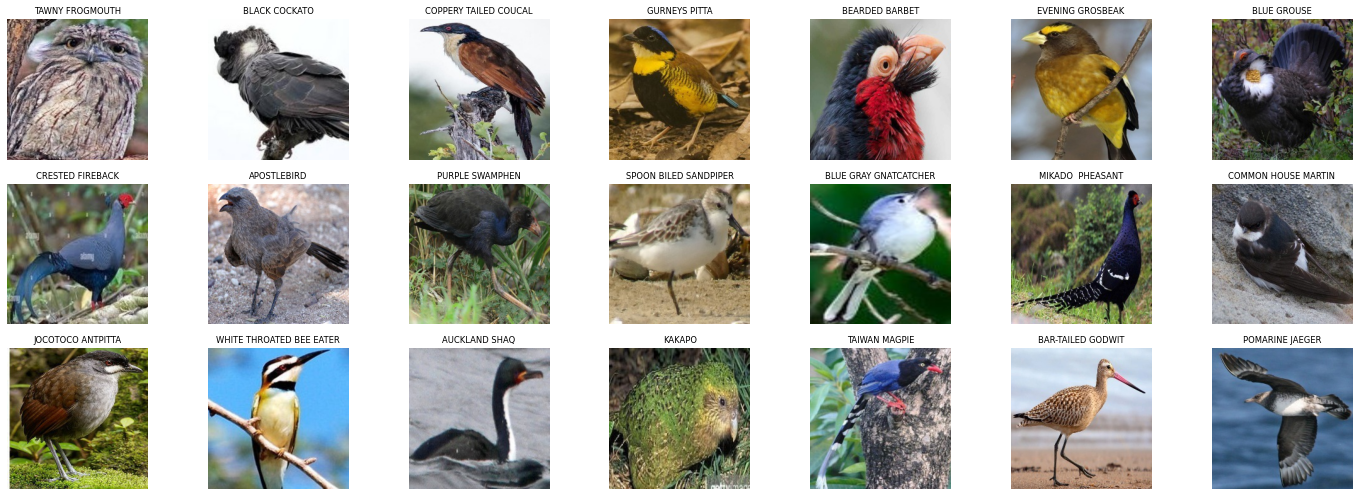

In [93]:
random_index = np.random.randint(0, len(TRAINSET), 21)
fig, axes = plt.subplots(nrows=3, ncols=7,figsize=(20, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(TRAINSET[random_index[i]][0].permute(1, 2, 0))
    ax.set_title(TRAINSET.classes[TRAINSET[random_index[i]][1]], fontsize='small')
    ax.axis('off')
plt.tight_layout()
plt.show()